In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Text(0, 0.5, 'perm')

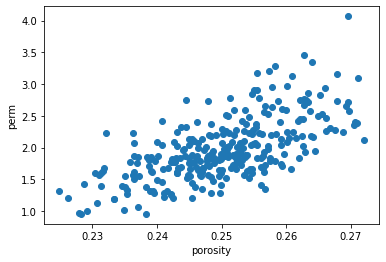

In [2]:
# data sandstone

phi_s = np.abs(np.random.normal(0.25,0.01,300))
swc_s = np.abs(np.random.normal(0.1,0.01,300))
k_s = 8.58102*(phi_s**(4.4))/(swc_s**2) ## Timur equation
plt.scatter(phi_s,k_s)
plt.xlabel('porosity')
plt.ylabel('perm')

Text(0, 0.5, 'perm(D)')

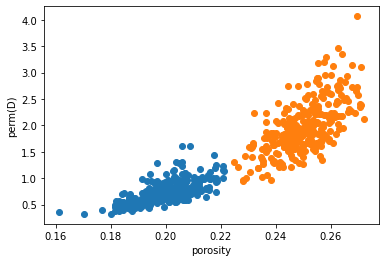

In [3]:
#Data
#Limestone
phi_l = np.abs(np.random.normal(0.20,0.01,300))
swc_l = np.abs(np.random.normal(0.1,0.01,300))
k_l = 8.58102*(phi_l**(4.4))/(swc_l**2)
plt.scatter(phi_l,k_l)
plt.scatter(phi_s,k_s)
plt.xlabel('porosity')
plt.ylabel('perm(D)')

In [4]:
#DataFrame Sandstone
dfS = pd.DataFrame({'Porosity':phi_s , 'Swc':swc_s, 'Permeability(D)':k_s})
dfS['label'] = 1
label_s = np.array(dfS['label'])
dfS['lithology'] = "Sandstone"
lithologyS = np.array(dfS['lithology'])
dfS

,Porosity,Swc,Permeability(D),label,lithology
0,0.262761,0.094835,2.664837,1,Sandstone
1,0.253380,0.101396,1.986541,1,Sandstone
2,0.255472,0.107496,1.832595,1,Sandstone
3,0.230796,0.109706,1.125344,1,Sandstone
4,0.236356,0.082153,2.228338,1,Sandstone
...,...,...,...,...,...
295,0.253870,0.112663,1.622791,1,Sandstone
296,0.256595,0.105906,1.924793,1,Sandstone
297,0.228688,0.095522,1.425620,1,Sandstone
298,0.263809,0.105777,2.179849,1,Sandstone


In [5]:
#DataFrame Limestone
dfL = pd.DataFrame({'Porosity':phi_l , 'Swc':swc_l, 'Permeability(D)':k_l})
dfL['label'] = 0
label_l = np.array(dfL['label'])
dfL['lithology'] = "Limestone"
lithologyL = np.array(dfL['lithology'])
dfL

,Porosity,Swc,Permeability(D),label,lithology
0,0.187126,0.104118,0.496448,0,Limestone
1,0.207165,0.104129,0.776576,0,Limestone
2,0.207966,0.120341,0.591390,0,Limestone
3,0.183171,0.092135,0.577108,0,Limestone
4,0.211129,0.098796,0.937706,0,Limestone
...,...,...,...,...,...
295,0.194734,0.082643,0.939025,0,Limestone
296,0.201304,0.113623,0.574851,0,Limestone
297,0.192689,0.103410,0.572506,0,Limestone
298,0.185516,0.103401,0.484579,0,Limestone


In [6]:
df_final = dfL.append(dfS,ignore_index=True)

In [7]:
df_final

,Porosity,Swc,Permeability(D),label,lithology
0,0.187126,0.104118,0.496448,0,Limestone
1,0.207165,0.104129,0.776576,0,Limestone
2,0.207966,0.120341,0.591390,0,Limestone
3,0.183171,0.092135,0.577108,0,Limestone
4,0.211129,0.098796,0.937706,0,Limestone
...,...,...,...,...,...
595,0.253870,0.112663,1.622791,1,Sandstone
596,0.256595,0.105906,1.924793,1,Sandstone
597,0.228688,0.095522,1.425620,1,Sandstone
598,0.263809,0.105777,2.179849,1,Sandstone


In [8]:
df_final = df_final.sample(frac = 1)

In [9]:
df_final


,Porosity,Swc,Permeability(D),label,lithology
244,0.170249,0.104767,0.323488,0,Limestone
426,0.239210,0.098894,1.621158,1,Sandstone
367,0.238327,0.106315,1.380093,1,Sandstone
532,0.249681,0.103037,1.803218,1,Sandstone
437,0.259216,0.113720,1.745745,1,Sandstone
...,...,...,...,...,...
101,0.213594,0.098786,0.987043,0,Limestone
215,0.188250,0.098547,0.568968,0,Limestone
565,0.257798,0.086327,2.957171,1,Sandstone
431,0.259257,0.102771,2.139009,1,Sandstone


In [10]:
#Setting Lithology with Label for Easy Prediction
lithology_name = dict(zip(df_final.label.unique(), df_final.lithology.unique()))   
lithology_name

{0: 'Limestone', 1: 'Sandstone'}

In [11]:
df_final

,Porosity,Swc,Permeability(D),label,lithology
244,0.170249,0.104767,0.323488,0,Limestone
426,0.239210,0.098894,1.621158,1,Sandstone
367,0.238327,0.106315,1.380093,1,Sandstone
532,0.249681,0.103037,1.803218,1,Sandstone
437,0.259216,0.113720,1.745745,1,Sandstone
...,...,...,...,...,...
101,0.213594,0.098786,0.987043,0,Limestone
215,0.188250,0.098547,0.568968,0,Limestone
565,0.257798,0.086327,2.957171,1,Sandstone
431,0.259257,0.102771,2.139009,1,Sandstone


In [12]:
X = df_final[['Porosity',  'Permeability(D)']]


In [13]:
y = np.array(df_final['label'])

In [14]:
y

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,

In [15]:
y.shape

(600,)

In [16]:
X.shape

(600, 2)

In [17]:
from sklearn.model_selection import train_test_split


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size =0.25)

In [27]:
y_train

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [28]:
y_train.shape

(450,)

In [29]:
y_test.shape

(150,)

## Modelling

In [30]:
import tensorflow as tf 

In [31]:
from tensorflow.keras.models import Sequential

In [33]:
from tensorflow.keras.layers import Dense

In [43]:
def create_baseline():
    #Create Model
    model = Sequential()
    model.add(Dense(60,input_dim = 2,activation = 'sigmoid'))
    model.add(Dense(30,activation = 'relu'))
    model.add(Dense(1,activation = 'sigmoid'))
    
    #Compile Model
    model.compile(loss = 'binary_crossentropy',optimizer = 'sgd',metrics = ['accuracy'])
    return model

In [44]:
model = create_baseline()

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 60)                180       
_________________________________________________________________
dense_7 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 2,041
Trainable params: 2,041
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = model.fit(X_train,y_train,validation_split=0.2,epochs=100,batch_size=32)

Epoch 1/100
12/12 [==============================] - 1s 38ms/step - loss: 0.8154 - accuracy: 0.4750 - val_loss: 0.7596 - val_accuracy: 0.5000
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7557 - accuracy: 0.4750 - val_loss: 0.7252 - val_accuracy: 0.5000
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.7286 - accuracy: 0.4750 - val_loss: 0.7159 - val_accuracy: 0.5000
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7182 - accuracy: 0.4722 - val_loss: 0.7102 - val_accuracy: 0.4889
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.7070 - accuracy: 0.4444 - val_loss: 0.7026 - val_accuracy: 0.0556
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7023 - accuracy: 0.0750 - val_loss: 0.7013 - val_accuracy: 0.0889
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7014 - accuracy: 0.3056 - val_loss: 0.7003 - val_accuracy: 0.5000
Epoch 8/100


Epoch 59/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6211 - accuracy: 0.9306 - val_loss: 0.6222 - val_accuracy: 0.9444
Epoch 60/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6186 - accuracy: 0.9417 - val_loss: 0.6202 - val_accuracy: 0.9444
Epoch 61/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6165 - accuracy: 0.9361 - val_loss: 0.6185 - val_accuracy: 0.9333
Epoch 62/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6144 - accuracy: 0.9111 - val_loss: 0.6161 - val_accuracy: 0.9333
Epoch 63/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6120 - accuracy: 0.9333 - val_loss: 0.6136 - val_accuracy: 0.9444
Epoch 64/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6091 - accuracy: 0.9028 - val_loss: 0.6101 - val_accuracy: 0.9667
Epoch 65/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6071 - accuracy: 0.9667 - val_loss: 0.6075 - val_accuracy: 0.9556
Epoch 

In [47]:
history

In [48]:
df = pd.DataFrame()
for i in history.history.keys():
    df[i] = history.history[i]

In [49]:
df

,loss,accuracy,val_loss,val_accuracy
0,0.815404,0.475000,0.759626,0.500000
1,0.755657,0.475000,0.725150,0.500000
2,0.728602,0.475000,0.715920,0.500000
3,0.718229,0.472222,0.710222,0.488889
4,0.707044,0.444444,0.702584,0.055556
...,...,...,...,...
95,0.500040,0.941667,0.503329,0.944444
96,0.495391,0.944444,0.497198,0.955556
97,0.490995,0.958333,0.492738,0.955556
98,0.486684,0.950000,0.489137,0.944444


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

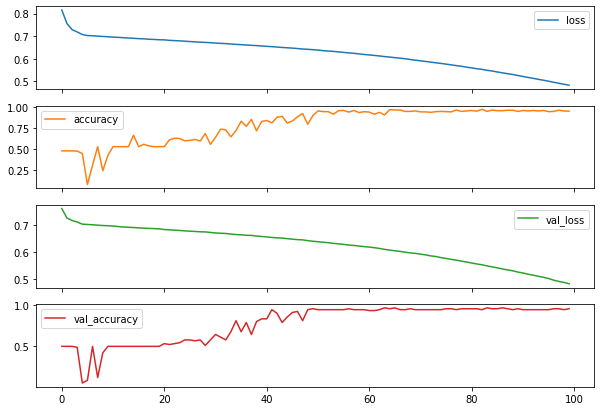

In [50]:
df.plot(subplots = True,figsize = (10,7))

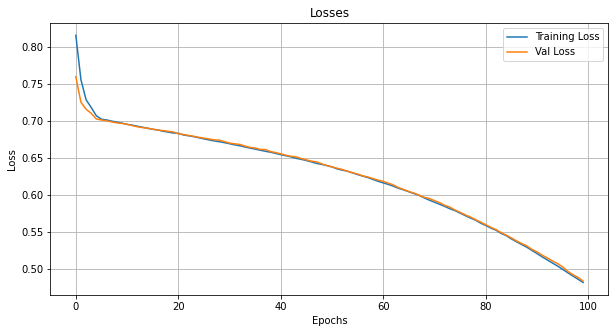

In [51]:
plt.figure(figsize = (10,5))
plt.plot(df['loss'],label = 'Training Loss')
plt.plot(df['val_loss'],label = 'Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Losses')
plt.legend()
plt.grid(True)

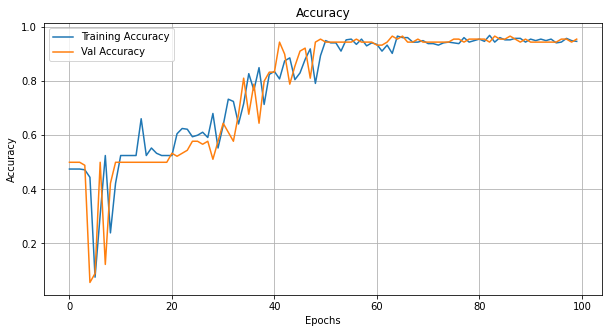

In [52]:
plt.figure(figsize = (10,5))
plt.plot(df['accuracy'],label = 'Training Accuracy')
plt.plot(df['val_accuracy'],label = 'Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.grid(True)

In [53]:
model.save('lithology_pred.h5')

In [54]:
model_load = tf.keras.models.load_model('lithology_pred.h5')

In [55]:
X_test

,Porosity,Permeability(D)
76,0.207094,0.923056
510,0.255144,2.067186
288,0.201345,0.847287
519,0.251572,2.080562
110,0.190563,0.434712
...,...,...
431,0.259257,2.139009
176,0.206890,1.103988
499,0.257533,1.836678
129,0.212329,1.167933


In [59]:
y_pred_class = model_load.predict(X_test)

In [60]:
y_pred_class

array([[0.40690437],
       [0.6424043 ],
       [0.39091083],
       [0.644801  ],
       [0.30900326],
       [0.42385507],
       [0.58560216],
       [0.593353  ],
       [0.39738312],
       [0.37566257],
       [0.66635287],
       [0.3307582 ],
       [0.747027  ],
       [0.655307  ],
       [0.36410308],
       [0.5733431 ],
       [0.37163252],
       [0.30782688],
       [0.66377753],
       [0.6672558 ],
       [0.37065732],
       [0.56610674],
       [0.5781068 ],
       [0.38579652],
       [0.73979723],
       [0.7250574 ],
       [0.7506229 ],
       [0.38252604],
       [0.5998326 ],
       [0.36636835],
       [0.62435395],
       [0.32548723],
       [0.76708   ],
       [0.45232666],
       [0.38217244],
       [0.5252447 ],
       [0.3616414 ],
       [0.33647662],
       [0.5673855 ],
       [0.55522096],
       [0.5891503 ],
       [0.36046588],
       [0.3293475 ],
       [0.5885303 ],
       [0.631079  ],
       [0.34357858],
       [0.3763011 ],
       [0.603

In [61]:
y_pred_class.shape

(150, 1)

In [63]:
y_pred_class = y_pred_class.reshape(150,)

In [64]:
y_pred_class

array([0.40690437, 0.6424043 , 0.39091083, 0.644801  , 0.30900326,
       0.42385507, 0.58560216, 0.593353  , 0.39738312, 0.37566257,
       0.66635287, 0.3307582 , 0.747027  , 0.655307  , 0.36410308,
       0.5733431 , 0.37163252, 0.30782688, 0.66377753, 0.6672558 ,
       0.37065732, 0.56610674, 0.5781068 , 0.38579652, 0.73979723,
       0.7250574 , 0.7506229 , 0.38252604, 0.5998326 , 0.36636835,
       0.62435395, 0.32548723, 0.76708   , 0.45232666, 0.38217244,
       0.5252447 , 0.3616414 , 0.33647662, 0.5673855 , 0.55522096,
       0.5891503 , 0.36046588, 0.3293475 , 0.5885303 , 0.631079  ,
       0.34357858, 0.3763011 , 0.6030102 , 0.71388113, 0.7068683 ,
       0.3286537 , 0.46351448, 0.33558497, 0.32085788, 0.37644172,
       0.5693431 , 0.395612  , 0.6803419 , 0.6201875 , 0.63747734,
       0.3875253 , 0.35896745, 0.49944386, 0.52695143, 0.5673958 ,
       0.56355435, 0.605541  , 0.60249555, 0.4282802 , 0.66807103,
       0.30760622, 0.41728574, 0.779104  , 0.3757451 , 0.34894

In [65]:
thresh = 0.5
y_class_pred = np.where(y_pred_class>thresh,1,0)

In [66]:
y_class_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0])

In [67]:
y_test

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
from sklearn.metrics import classification_report

In [70]:
cr = classification_report(y_test,y_class_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93        66
           1       0.99      0.89      0.94        84

    accuracy                           0.93       150
   macro avg       0.93      0.94      0.93       150
weighted avg       0.94      0.93      0.93       150



In [71]:
def inference():
    poro = float(input('Enter Porosity: '))
    perm = float(input('Enter Perm: '))
    poro = np.array(poro)
    perm = np.array(perm)
    inp = np.array([poro,perm]).reshape(1,2)
    pred = model.predict(inp)
    thresh= 0.5
    clas = np.where(pred>thresh,1,0)
    if clas[0]==0:
        clas = 'Limestone'
    else:
        clas = 'Sandstone'
    print(f'Your Lithology is {clas} for given perm and poro' )

In [75]:
inference()

Enter Porosity: 0.1
Enter Perm: 1
Your Lithology is Limestone for given perm and poro


# regression

In [76]:
df = pd.read_csv('Volve P-12_DatesCorrected.csv',index_col=0,parse_dates=True)


In [77]:
df

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-08,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
2016-01-09,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
2016-01-10,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
2016-01-11,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

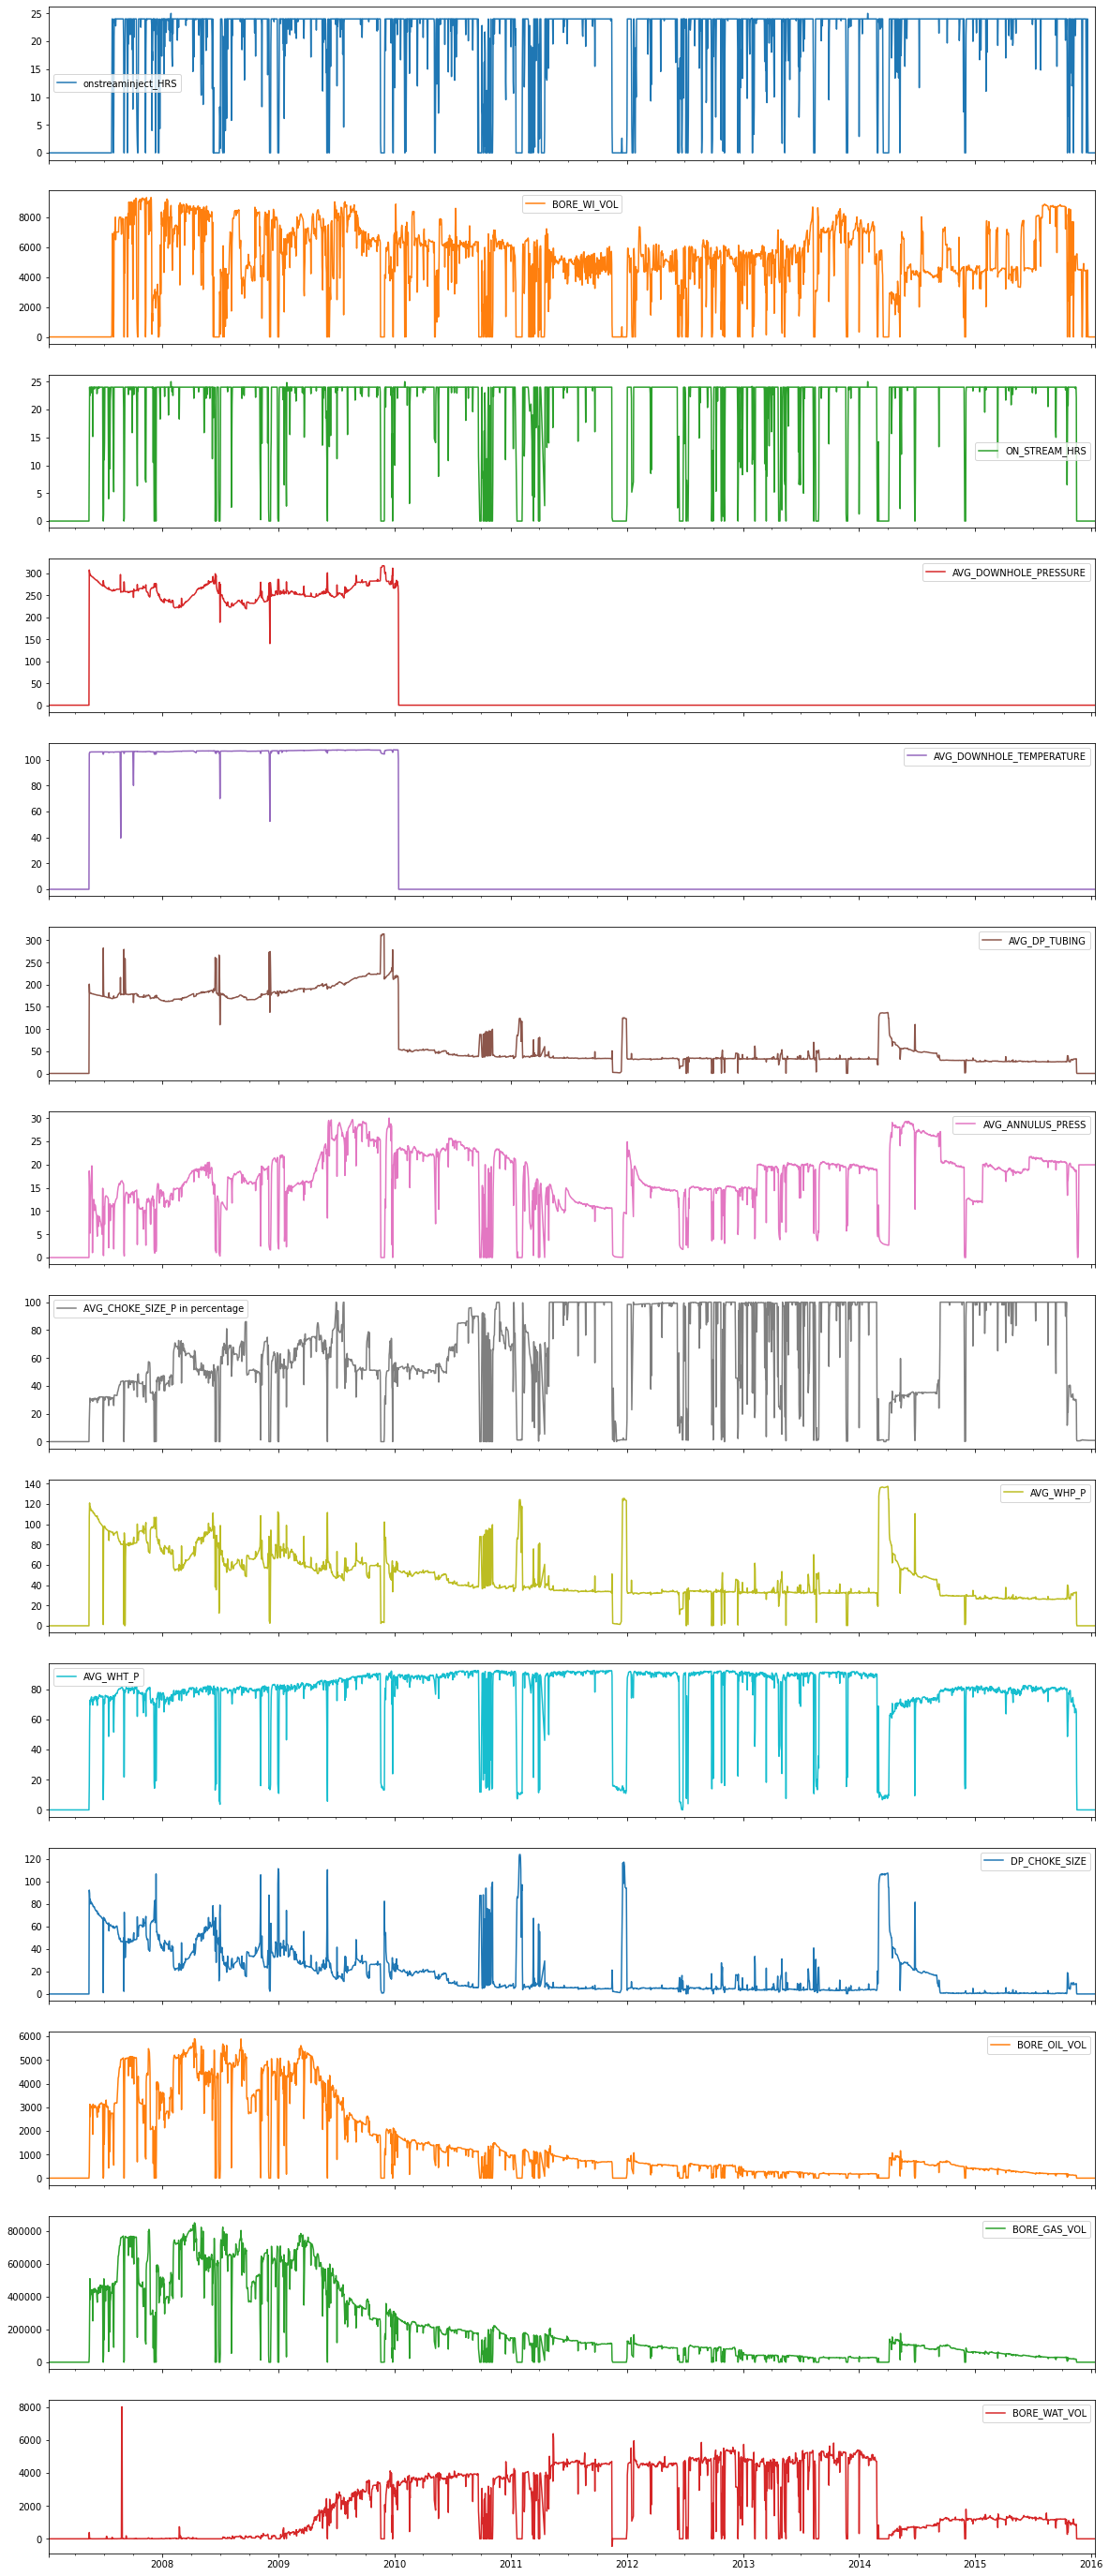

In [78]:
df.plot(subplots = True,figsize = (20,50))

In [80]:
to_drop =["BORE_GAS_VOL",'AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE','BORE_OIL_VOL']
features= df.drop(to_drop,axis = 1)

In [82]:
features

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_WAT_VOL
2007-01-09,0.0,0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0
2007-01-10,0.0,0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0
2007-01-11,0.0,0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0
2007-01-12,0.0,0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0
2007-01-13,0.0,0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...
2016-01-08,0.0,0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0
2016-01-09,0.0,0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0
2016-01-10,0.0,0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0
2016-01-11,0.0,0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0


In [83]:
labels = df['BORE_OIL_VOL']

In [84]:
from sklearn.model_selection import train_test_split
df_train, df_test, train_labels,test_labels = train_test_split(features, labels,test_size = 0.3,shuffle=True)

In [86]:
train_stats = df_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
onstreaminject_HRS,2303.0,19.311372,8.858998,0.0,21.15500,24.00000,24.000000,25.000
BORE_WI_VOL,2303.0,4877.906644,2667.161714,0.0,3795.50000,5259.00000,6855.000000,9309.000
ON_STREAM_HRS,2303.0,19.771245,8.540062,0.0,23.50000,24.00000,24.000000,25.000
AVG_DP_TUBING,2303.0,81.350713,73.569738,0.0,32.20950,38.10700,170.399000,314.134
AVG_ANNULUS_PRESS,2303.0,16.262710,7.282165,0.0,12.46250,17.91600,20.548000,30.020
AVG_CHOKE_SIZE_P in percentage,2303.0,63.231263,34.182003,0.0,39.57848,65.08566,99.851555,100.000
AVG_WHP_P,2303.0,45.800241,26.492962,0.0,32.14650,37.63900,59.209500,137.311
AVG_WHT_P,2303.0,73.551268,26.822323,0.0,76.23200,81.35300,89.830500,92.459
DP_CHOKE_SIZE,2303.0,18.897992,23.332642,0.0,3.56800,7.01400,26.760500,124.123
BORE_WAT_VOL,2303.0,2045.225973,1940.719338,-229.0,28.00000,1238.00000,3973.000000,8020.000


In [87]:
def norm(x):
  return (x-train_stats['mean'])/train_stats['std']
normed_train_data = norm(df_train)
normed_test_data = norm(df_test)

In [88]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64,activation = 'relu',input_shape=[len(df_train.keys())]),
        tf.keras.layers.Dense(64,activation = 'relu'),
        tf.keras.layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss = 'mse',optimizer = optimizer,metrics=['mae','mse'])
    
    return model

In [89]:
model = build_model()

In [90]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


In [91]:
history = model.fit(normed_train_data, train_labels,epochs = 100, validation_split = 0.2)

Epoch 1/100
58/58 [==============================] - 1s 6ms/step - loss: 4737551.5000 - mae: 1410.6740 - mse: 4737551.5000 - val_loss: 4614102.5000 - val_mae: 1375.6615 - val_mse: 4614102.5000
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 4687016.5000 - mae: 1399.2241 - mse: 4687016.5000 - val_loss: 4535309.5000 - val_mae: 1358.6167 - val_mse: 4535309.5000
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 4573331.5000 - mae: 1374.9839 - mse: 4573331.5000 - val_loss: 4382613.5000 - val_mae: 1326.7145 - val_mse: 4382613.5000
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 4368954.0000 - mae: 1332.4802 - mse: 4368954.0000 - val_loss: 4129477.2500 - val_mae: 1275.0258 - val_mse: 4129477.2500
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 4065695.0000 - mae: 1269.2318 - mse: 4065695.0000 - val_loss: 3778369.5000 - val_mae: 1203.8770 - val_mse: 3778369.5000
Epoch 6/100
58/58 [================

58/58 [==============================] - 0s 2ms/step - loss: 304599.3125 - mae: 384.0814 - mse: 304599.3125 - val_loss: 308364.1250 - val_mae: 391.2007 - val_mse: 308364.1250
Epoch 45/100
58/58 [==============================] - 0s 2ms/step - loss: 298381.9375 - mae: 380.3795 - mse: 298381.9375 - val_loss: 301389.6875 - val_mae: 386.3927 - val_mse: 301389.6875
Epoch 46/100
58/58 [==============================] - 0s 2ms/step - loss: 291239.6562 - mae: 375.8318 - mse: 291239.6562 - val_loss: 291738.9062 - val_mae: 379.6746 - val_mse: 291738.9062
Epoch 47/100
58/58 [==============================] - 0s 2ms/step - loss: 283118.7812 - mae: 370.2256 - mse: 283118.7812 - val_loss: 285966.2188 - val_mae: 376.2463 - val_mse: 285966.2188
Epoch 48/100
58/58 [==============================] - 0s 2ms/step - loss: 275524.8438 - mae: 365.8614 - mse: 275524.8438 - val_loss: 276305.9688 - val_mae: 369.0034 - val_mse: 276305.9688
Epoch 49/100
58/58 [==============================] - 0s 2ms/step - loss:

Epoch 88/100
58/58 [==============================] - 0s 3ms/step - loss: 87880.6016 - mae: 177.9016 - mse: 87880.6016 - val_loss: 102547.0000 - val_mae: 188.9663 - val_mse: 102547.0000
Epoch 89/100
58/58 [==============================] - 0s 2ms/step - loss: 86775.2891 - mae: 175.6752 - mse: 86775.2891 - val_loss: 101988.4219 - val_mae: 188.0262 - val_mse: 101988.4219
Epoch 90/100
58/58 [==============================] - 0s 3ms/step - loss: 86204.3984 - mae: 174.7386 - mse: 86204.3984 - val_loss: 100588.8906 - val_mae: 186.4333 - val_mse: 100588.8906
Epoch 91/100
58/58 [==============================] - 0s 2ms/step - loss: 85351.8984 - mae: 173.4673 - mse: 85351.8984 - val_loss: 99133.8203 - val_mae: 185.7749 - val_mse: 99133.8203
Epoch 92/100
58/58 [==============================] - 0s 2ms/step - loss: 85096.3594 - mae: 173.2849 - mse: 85096.3594 - val_loss: 101342.0703 - val_mae: 185.3577 - val_mse: 101342.0703
Epoch 93/100
58/58 [==============================] - 0s 5ms/step - loss

In [92]:
loss, mae , mse = model.evaluate(normed_test_data, test_labels, verbose = 0)
print('Mean Absolute Error', mae)


Mean Absolute Error 181.7736358642578


In [93]:
test_predictions = model.predict(normed_test_data).flatten()


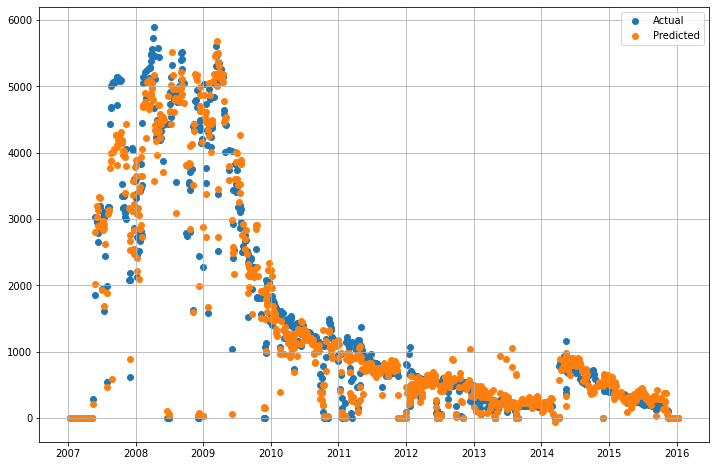

In [94]:
plt.figure(figsize=(12,8))
plt.scatter(df_test.index,test_labels,label= 'Actual')
plt.scatter(df_test.index,test_predictions,label = 'Predicted')
plt.grid()
plt.legend()